# Lesson 13 activity: probability distributions - Solution

## Learning objectives

This activity will help you to:

1. Understand and apply binomial distributions to model discrete events
2. Demonstrate the Central Limit Theorem through sampling distributions
3. Visualize theoretical and empirical probability distributions
4. Connect statistical theory to real-world data analysis

## Setup

Import the required libraries and load the weather dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: binomial distribution - modeling rainy days

**Objective**: Understand and visualize binomial distributions using real weather data.

The binomial distribution models the number of successes in a fixed number of independent trials. In weather forecasting, we can use it to model the probability of rainy days over a period of time.

**Tasks**:

1. **Calculate the probability of rain**:
   - Count how many days in the dataset have `rainfall_inches > 0`
   - Calculate the proportion of rainy days (this is your probability `p`)
   - Print this probability with an interpretation (e.g., "Based on our data, there's a X% chance of rain on any given day")

2. **Create a theoretical binomial distribution**:
   - Assume you're looking at a 30-day period (like a month)
   - Using the probability from step 1, calculate the theoretical probability of getting exactly k rainy days for k = 0, 1, 2, ..., 30
   - Use `scipy.stats.binom.pmf()`

3. **Visualize the distribution**:
   - Create a bar plot showing the probability of each possible number of rainy days (0 to 30)
   - Add a vertical line showing the expected value (mean = n × p)
   - Label the axes appropriately
   - Include a title with the probability of rain

4. **Interpret** your findings:
   - What is the most likely number of rainy days in a 30-day period?
   - What is the expected (mean) number of rainy days?
   - What's the probability of having 15 or more rainy days in a month?
   - How does this distribution help weather forecasters make predictions?
   - **Bonus**: Calculate the standard deviation and explain what it tells you about the variability in monthly rainfall patterns

### Probability of rain calculation

In [ ]:
rainy_days = len(df[df['weather_condition'] == 'Rainy'])
total_days = len(df)
p_rain = rainy_days / total_days

print(f"Based on our data, there's a {p_rain*100:.1f}% chance of rain on any given day")

Based on our data, there's a 19.5% chance of rain on any given day


### Binomial distribution calculation

In [8]:
# 2. Create theoretical binomial distribution
n_days = 30
k_values = np.arange(0, n_days + 1)
probabilities = stats.binom.pmf(k_values, n_days, p_rain)

### Binomial distribution plot

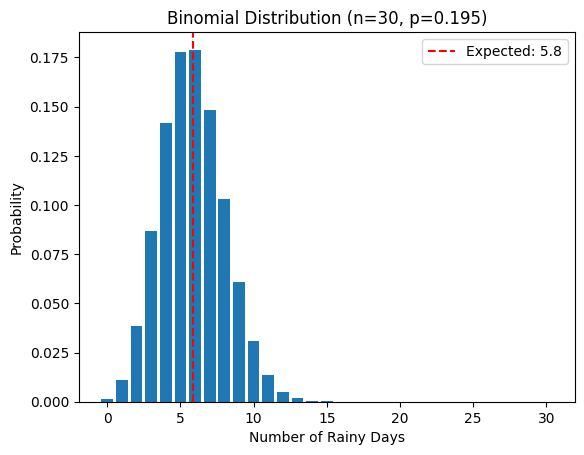

In [9]:
# 3. Visualize the distribution
expected_value = n_days * p_rain

plt.bar(k_values, probabilities)
plt.axvline(expected_value, color='red', linestyle='--', label=f'Expected: {expected_value:.1f}')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n=30, p={p_rain:.3f})')
plt.legend()
plt.show()

### Interpretation

**Most likely number of rainy days**: The mode of the distribution (tallest bar) shows the most probable outcome - 6 rainy days.

**Expected number of rainy days**: The expected value (mean) is `n × p = 5.85`.

**Probability of 15+ rainy days**: We can calculate this using the cumulative distribution function.

### Probability of >= 15 rainy days

In [ ]:
prob_15_or_more = 1 - stats.binom.cdf(14, n_days, p_rain)

print(f"Probability of 15+ rainy days: {prob_15_or_more:.4f} ({prob_15_or_more*100:.2f}%)")

Probability of 15+ rainy days: 0.0002 (0.02%)


### Extra: Binomial cumulative distribution function (CDF) visualization

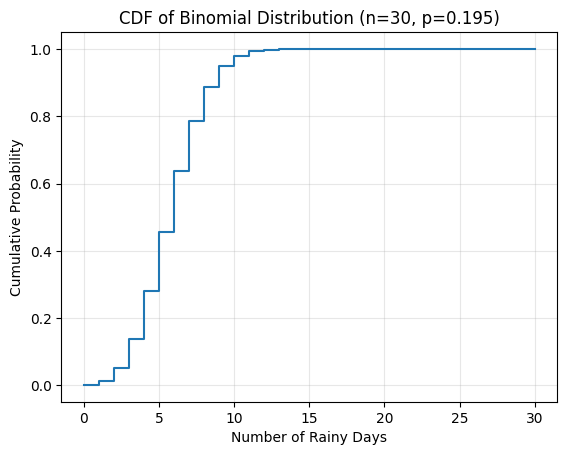

In [14]:
# CDF plot of the binomial distribution
cumulative_probs = stats.binom.cdf(k_values, n_days, p_rain)

plt.step(k_values, cumulative_probs, where='post')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Cumulative Probability')
plt.title(f'CDF of Binomial Distribution (n=30, p={p_rain:.3f})')
plt.grid(alpha=0.3)
plt.show()

**How this helps forecasters**: The binomial distribution allows forecasters to quantify uncertainty in predictions. Instead of just saying "it might rain," they can provide probabilities for different scenarios (e.g., "there's a 5% chance of more than 15 rainy days this month").

In [15]:
std_dev = np.sqrt(n_days * p_rain * (1 - p_rain))
print(f"Standard deviation: {std_dev:.2f}")

Standard deviation: 2.17


**Standard deviation interpretation**: The standard deviation indicates the typical variability in the number of rainy days per month. A higher standard deviation means more unpredictable monthly rainfall patterns.

## Exercise 2: central limit theorem - sampling distribution of rainfall

**Objective**: Demonstrate the Central Limit Theorem by creating and analyzing a sampling distribution.

The Central Limit Theorem (CLT) states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the population's original distribution. This is fundamental to statistical inference.

**Tasks**:

1. **Examine the population distribution**:
   - Create a histogram of all `rainfall_inches` values in the dataset
   - Calculate and print the population mean and standard deviation
   - Note the shape of this distribution (is it normal, skewed, etc.?)

2. **Create a sampling distribution**:
   - Take 1000 random samples from the rainfall data, each of size n=30
   - For each sample, calculate the mean rainfall
   - Store all 1000 sample means in a list or array
   - Hint: Use `df['rainfall_inches'].sample(n=30, replace=True)` for each sample

3. **Visualize the sampling distribution**:
   - Create a histogram of the 1000 sample means
   - Overlay a normal distribution curve using the theoretical mean (μ) and standard error (σ/√n)
   - Add a vertical line at the population mean
   - You can use `scipy.stats.norm.pdf()` to create the normal curve
   - Label axes and add a descriptive title

4. **Compare distributions**:
   - Create two side-by-side histograms:
     - Left: Original rainfall distribution (from step 1)
     - Right: Sampling distribution of means (from step 3)
   - Make sure both use the same y-axis scale for comparison
   - Include the mean and standard deviation in each subplot title

5. **Interpret** your findings:
   - How does the shape of the sampling distribution compare to the original distribution?
   - Is the sampling distribution approximately normal? (This demonstrates the CLT!)
   - Calculate the standard error: population σ divided by √30. How does this compare to the standard deviation of your sample means?
   - What does the CLT tell us about why we can use normal-based methods (like confidence intervals) even when our data isn't normally distributed?
   - **Bonus**: Repeat the experiment with different sample sizes (n=5, n=10, n=50). How does sample size affect the spread and normality of the sampling distribution?

### Population distribution

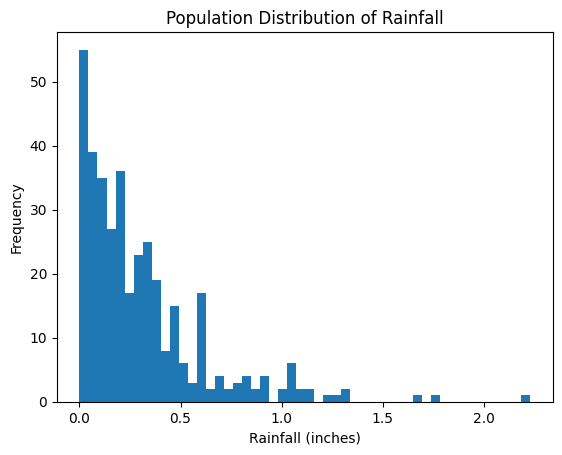

Population mean: 0.3037
Population std: 0.3115


In [ ]:
population_mean = df['rainfall_inches'].mean()
population_std = df['rainfall_inches'].std()

plt.hist(df['rainfall_inches'], bins=50)
plt.xlabel('Rainfall (inches)')
plt.ylabel('Frequency')
plt.title('Population Distribution of Rainfall')
plt.show()

print(f"Population mean: {population_mean:.4f}")
print(f"Population std: {population_std:.4f}")

The population distribution is highly right-skewed with many zero values (no rain) and a long tail of higher rainfall amounts.

### Sampling

In [ ]:
n_samples = 1000
sample_size = 30
sample_means = []

for _ in range(n_samples):
    sample = df['rainfall_inches'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

### Sampling distribution plot

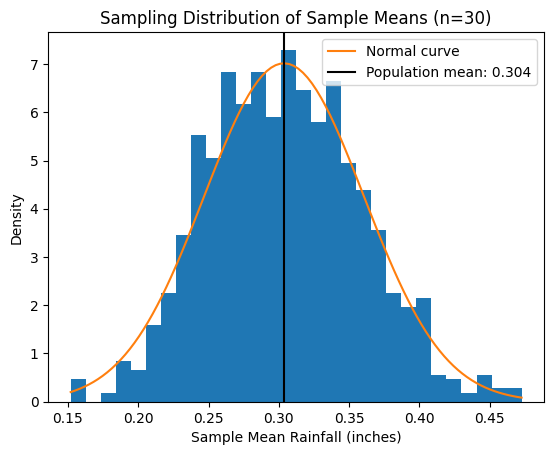

In [ ]:
standard_error = population_std / np.sqrt(sample_size)

# Normal curve
x = np.linspace(sample_means.min(), sample_means.max(), 100)

plt.title('Sampling Distribution of Sample Means (n=30)')
plt.hist(sample_means, bins=30, density=True)
plt.plot(x, stats.norm.pdf(x, population_mean, standard_error), label='Normal curve')
plt.axvline(population_mean, color='black', label=f'Population mean: {population_mean:.3f}')
plt.xlabel('Sample Mean Rainfall (inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Sampling distribution versus population comparison

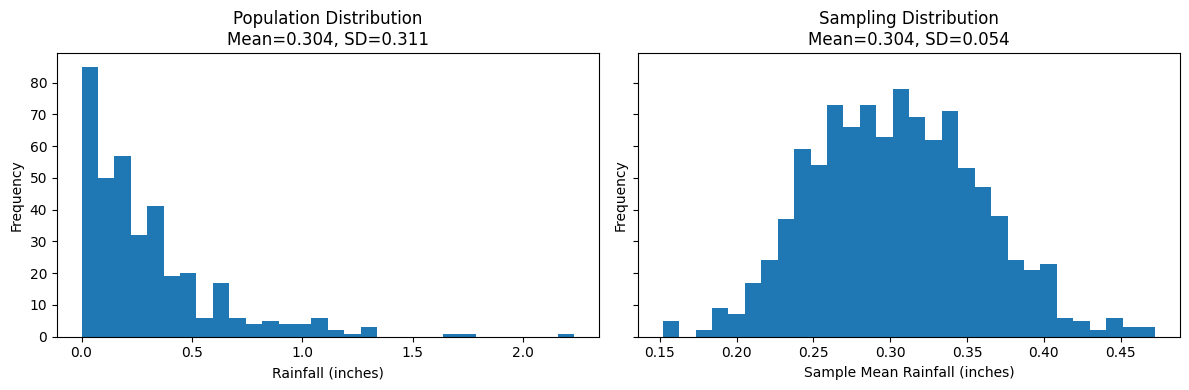

In [23]:
# 4. Compare distributions
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

ax1.set_title(f'Population Distribution\nMean={population_mean:.3f}, SD={population_std:.3f}')
ax1.hist(df['rainfall_inches'], bins=30)
ax1.set_xlabel('Rainfall (inches)')
ax1.set_ylabel('Frequency')

ax2.set_title(f'Sampling Distribution\nMean={sample_means.mean():.3f}, SD={sample_means.std():.3f}')
ax2.hist(sample_means, bins=30)
ax2.set_xlabel('Sample Mean Rainfall (inches)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Interpretation

**Shape comparison**: The original rainfall distribution is highly right-skewed, but the sampling distribution of means is approximately normal and symmetric. This is the Central Limit Theorem in action!

**Normality**: Yes, the sampling distribution is approximately normal despite the original data being non-normal.

**Standard error comparison**:

In [25]:
theoretical_se = population_std / np.sqrt(sample_size)
empirical_se = sample_means.std()

print(f"Theoretical standard error: {theoretical_se:.4f}")
print(f"Empirical standard error: {empirical_se:.4f}")
print(f"Difference: {abs(theoretical_se - empirical_se):.4f}")

Theoretical standard error: 0.0569
Empirical standard error: 0.0540
Difference: 0.0028


The theoretical and empirical standard errors match closely, confirming the CLT prediction.

**Why CLT matters**: The CLT explains why we can use normal-based statistical methods (like confidence intervals and hypothesis tests) even when our data isn't normally distributed. As long as our sample size is large enough, the sampling distribution of the mean will be approximately normal, allowing us to make valid inferences.

### Bonus: Effect of Sample Size

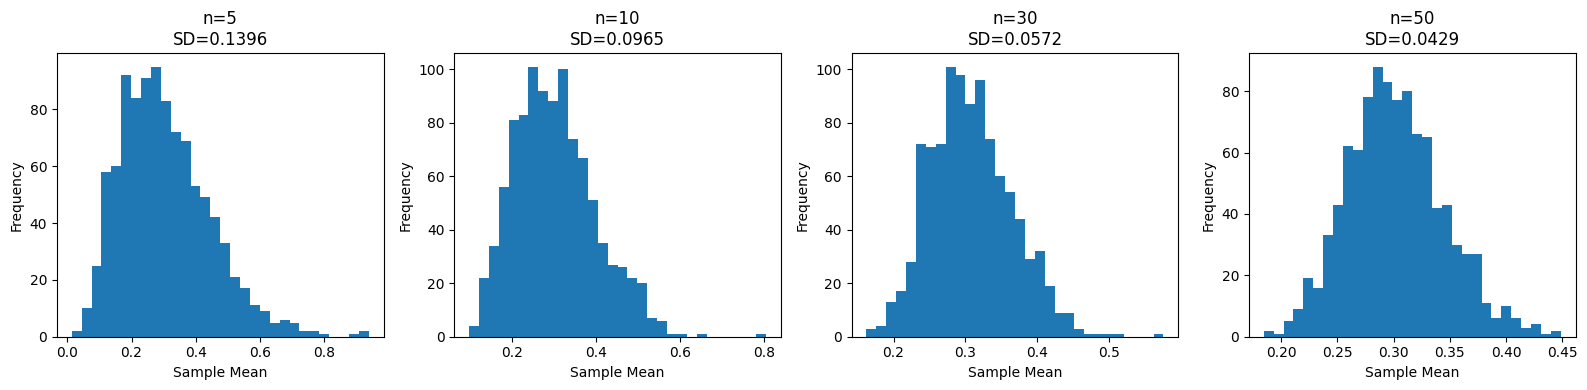

In [28]:
# Bonus: Different sample sizes
sample_sizes = [5, 10, 30, 50]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, n in enumerate(sample_sizes):

    sample_means_n = []

    for _ in range(1000):
        sample = df['rainfall_inches'].sample(n=n, replace=True)
        sample_means_n.append(sample.mean())
    
    sample_means_n = np.array(sample_means_n)
    
    axes[idx].hist(sample_means_n, bins=30)
    axes[idx].set_xlabel('Sample Mean')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'n={n}\nSD={sample_means_n.std():.4f}')

plt.tight_layout()
plt.show()

**Observation**: As sample size increases, the sampling distribution becomes more normal and has less spread (smaller standard error). Larger samples provide more precise estimates of the population mean.